## 1. fashion MNIST
다음의 조건을 만족하면서 test 데이터에 대한 예측의 정확도를 최대로 높여라.
CNN을 이용한다. 그 외에 인공신경망 구조는 자유롭게 선택한다.
model은 클래스를 이용하여 직접 작성한다.
output은 10개(0~9)로 설정한다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import ToTensor

train_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

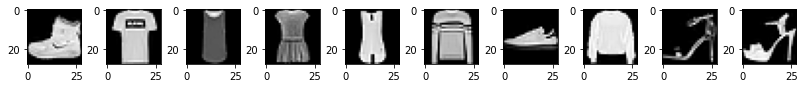

In [3]:
plt.figure(figsize=(14,1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_data.data[i],cmap=plt.cm.gray);

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=6*6*64, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=100)
        self.fc3 = nn.Linear(in_features=100, out_features=10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

model = net()

learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

model

net(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [6]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(
    dataset = train_data,
    batch_size = batch_size,
    shuffle = True
)
test_loader = torch.utils.data.DataLoader(
    dataset = test_data,
    batch_size = batch_size,
    shuffle = False
)

In [7]:
def evaluation(model, criterion, optimizer, data):
    model.eval() #evaluation
    test_loss = 0
    accuracy = 0
    with torch.no_grad(): # no update
        for X, y in data:
            y_pred = model(X)
            test_loss += criterion(y_pred, y)
            
            prediction = y_pred.max(1)[1] # max indices
            corrects = (prediction == y)
            accuracy += corrects.sum().float() / float( y.size(0) )
    return test_loss, accuracy 

In [8]:
def train(model,criterion, optimizier, train_loader):
    model.train()
    for batch_i, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        
        output = model(data)
        loss = F.cross_entropy(output, target)
        
        loss.backward()
        optimizer.step()
            
    print(f"\n Train Epoch: {epoch} \tLoss: {loss.item():.6f}")
    return loss

In [ ]:
nums_epoch = 10
for epoch in range(nums_epoch):
    train(model, criterion, optimizer, train_loader)
    
    if(epoch% 2==0):
        E, accu = evaluation(model, criterion, optimizer, test_loader)
        print(epoch, "loss=", E.item(), "accu=", accu.item())

### 2. 아래의 글을 읽고 500자 이내로 감상문을 작성하세요.

딥마인드의 알파폴드1은 단백질 구조 예측대회에서 기존의 탑그룹과는 달리 CNN, MSA를 도입시켜 1위를 하였다. 이후 베이커 그룹의 trRosetta는 아미노산 서열을 두 배열 사이의 거리뿐만 아니라 각도까지 고려하였고 알파폴드1을 뛰어넘었다. 하지만 다음해 딥마인드는 CNN을 과감히 버리고 transformer와 attention을 도입하였고, 알파폴드2는 다시 1위가 되었다. 기존에 연구되던 방식인 CNN을 버리고 새로운 길을 택한 딥마인드의 생각은 너무나도 놀라웠다. 자기 자신의 위치에서 최선을 다하는 것뿐만 아니라 새로운 것을 시도하고 새로운 이론을 만들어나가는 모습이 인상깊었다. 또한 알파폴드의 등장에 따라 단백질 구조 예측 분야의 발전이 급속도로 빨라졌는데, 이를 보면서도 학계의 발전에는 새로운 패러다임이 제시되어야 한다는 생각도 하게 되었다. 머신러닝을 통해서 단백질 구조를 예측할 수 있다는 것도 생소하였는데, 기존의 순수학문 성향 물리학에 머신러닝을 접목한다는 것에서 물리라는 학문의 무한한 가능성을 느끼게 되었다. 또한 내가 알고 있던 물리 분야의 스펙트럼이 참 좁았다는 것도 알게 되었고, 최근 통계역학과 입자물리학에서 머신러닝을 통한 발전이 방대하게 이루어지고 있다는 사실도 흥미로웠다.